In [ ]:
import math
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime
import time
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('classic')
%matplotlib inline
sns.set()

from google.colab import drive
drive.mount('/gdrive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Mounted at /gdrive


### Functions

In [ ]:
def scatterplots(df, numeric_columns):
    combs = itertools.combinations(numeric_columns, 2)

    for col_comb in combs:
        plt.figure(figsize=(6, 4))
        x = df[col_comb[0]].values
        y = df[col_comb[1]].values
        plt.scatter(x, y)
        plt.title('Scatter Plot {}  VS  {}'.format(col_comb[0], col_comb[1]), pad=20, fontsize=15)
        plt.xlabel(col_comb[0], fontsize=12)
        plt.ylabel(col_comb[1], fontsize=12)
        plt.show()

def timeSeriesPlots(df_ts):
    for col in df_ts.columns:
        plt.figure(figsize=(20,3))
        plt.plot(df_ts[col])
        plt.title(col, pad=15, size=15)
        plt.show()

def autocorr_func(ts, nbr_lags=30):

    plot_acf(ts.values, lags=nbr_lags)
    plt.title('"' + ts.name + '"'+ ' Autocorrelation Function', pad=15, size=15)
    plt.show()

    plot_pacf(ts.values, lags=nbr_lags)
    plt.title('"' + ts.name + '"'+ ' Partial Autocorrelation Function', pad=15, size=15)
    plt.show()

# 2019

## Tweets

In [ ]:
df_tweets_sentiment_2019 = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_tweets_sentiment_2019.csv")

df_tweets_sentiment_2019

,date,text,vader_polarity,vader_sentiment,transformers_sentiment
0,2019-05-06 02:25:41,wish token giveaway retweet and like this twee...,0.7351,1,1
1,2019-05-06 02:29:30,wish is a decentralized reward platform powere...,0.9451,1,1
2,2019-05-06 03:34:48,new tasks added to contest enter to win huge c...,0.8442,1,1
3,2019-05-06 05:29:29,achain congrats our community member artemiycr...,0.8625,1,1
4,2019-05-06 05:50:31,join on kingcuan our bot will automatically ma...,0.7506,1,1
...,...,...,...,...,...
518997,2019-09-26 23:57:50,on september daps will make its long awaited t...,0.7884,1,1
518998,2019-09-26 23:58:06,judge denies release of canadian man accused o...,-0.8316,0,0
518999,2019-09-26 23:58:30,dutchsunset alexkjanssen alexcobb this message...,-0.4588,0,0
519000,2019-09-26 23:58:46,pezosaso aaronlevi ltc apompliano changing the...,-0.5994,0,0


In [ ]:
df_topic_2019 = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_dominant_topic_2019.csv", usecols=["Keywords"])

df_topic_2019.columns = ["keywords"]

df_topic_2019

,keywords
0,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
2,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
3,"BITCOIN, price, time, block, transactions, siz..."
4,"BITCOIN, make, trade, mining, free, today, tra..."
...,...
518997,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
518998,"BITCOIN, scam, read, million, ban, man, future..."
518999,"people, market, shit, bsv, bad, hard, years, g..."
519000,"people, gold, libra, fiat, network, work, apom..."


In [ ]:
df_tweets_sentiment_2019 = pd.merge(df_tweets_sentiment_2019, df_topic_2019, how="inner", right_index=True, left_index=True)

df_tweets_sentiment_2019['date'] = pd.to_datetime(df_tweets_sentiment_2019['date'])
df_tweets_sentiment_2019 = df_tweets_sentiment_2019.set_index(['date']).sort_index()

df_tweets_sentiment_2019

,text,vader_polarity,vader_sentiment,transformers_sentiment,keywords
date,,,,,
2019-05-06 02:25:41,wish token giveaway retweet and like this twee...,0.7351,1,1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
2019-05-06 02:29:30,wish is a decentralized reward platform powere...,0.9451,1,1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
2019-05-06 03:34:48,new tasks added to contest enter to win huge c...,0.8442,1,1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
2019-05-06 05:29:29,achain congrats our community member artemiycr...,0.8625,1,1,"BITCOIN, price, time, block, transactions, siz..."
2019-05-06 05:50:31,join on kingcuan our bot will automatically ma...,0.7506,1,1,"BITCOIN, make, trade, mining, free, today, tra..."
...,...,...,...,...,...
2019-09-26 23:57:50,on september daps will make its long awaited t...,0.7884,1,1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
2019-09-26 23:58:06,judge denies release of canadian man accused o...,-0.8316,0,0,"BITCOIN, scam, read, million, ban, man, future..."
2019-09-26 23:58:30,dutchsunset alexkjanssen alexcobb this message...,-0.4588,0,0,"people, market, shit, bsv, bad, hard, years, g..."


In [ ]:
df_tweets_sentiment_2019.index.strftime('%Y-%m-%d %H:%M:00')[:2]

Index(['2019-05-06 02:25:00', '2019-05-06 02:29:00'], dtype='object', name='date')

In [ ]:
agg_dict = {"text": "count",
            "vader_polarity": "median",
            "vader_sentiment": lambda x: x.value_counts().index[0],
            "transformers_sentiment": lambda x: x.value_counts().index[0],
            "keywords": lambda x: x.value_counts().index[0]
            }

In [ ]:
df_tweets_2019_grouped = df_tweets_sentiment_2019.groupby(df_tweets_sentiment_2019.index.strftime('%Y-%m-%d %H:%M:00')).agg(agg_dict)

df_tweets_2019_grouped.columns = ["tweets_volume", "median_polarity", "vader_sentiment_mode", "transformers_sentiment_mode", "topic_mode"]

df_tweets_2019_grouped

,tweets_volume,median_polarity,vader_sentiment_mode,transformers_sentiment_mode,topic_mode
date,,,,,
2019-05-06 02:25:00,1,0.73510,1,1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
2019-05-06 02:29:00,1,0.94510,1,1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
2019-05-06 03:34:00,1,0.84420,1,1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."
2019-05-06 05:29:00,1,0.86250,1,1,"BITCOIN, price, time, block, transactions, siz..."
2019-05-06 05:50:00,1,0.75060,1,1,"BITCOIN, make, trade, mining, free, today, tra..."
...,...,...,...,...,...
2019-09-26 23:55:00,4,0.81435,1,1,"people, market, shit, bsv, bad, hard, years, g..."
2019-09-26 23:56:00,2,-0.49365,0,1,"money, BITCOIN, news, love, trading, business,..."
2019-09-26 23:57:00,2,0.78335,1,1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite..."


## Prices

In [ ]:
df_prices_2019 = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_prices_2019.csv")

df_prices_2019['date'] = pd.to_datetime(df_prices_2019['date'])
df_prices_2019 = df_prices_2019.set_index(['date']).sort_index()

df_prices_2019

,close
date,
2019-05-06 00:00:00,5716.38
2019-05-06 00:01:00,5721.00
2019-05-06 00:02:00,5719.19
2019-05-06 00:03:00,5716.28
2019-05-06 00:04:00,5708.76
...,...
2019-09-26 23:56:00,8052.66
2019-09-26 23:57:00,8056.47
2019-09-26 23:58:00,8051.84


In [ ]:
df_prices_2019["returns"] = np.log(df_prices_2019["close"]/df_prices_2019["close"].shift(1)) * 100

df_prices_2019 = df_prices_2019.iloc[1:]

In [ ]:
df_prices_2019["up_down"] = df_prices_2019["returns"].apply(lambda x: 1 if x >= 0 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
window = 240  # 4 ore

df_prices_2019["volatility"] = df_prices_2019["returns"].rolling(window).std(ddof=0)

df_prices_2019 = df_prices_2019.iloc[239:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_prices_2019

,close,returns,up_down,volatility
date,,,,
2019-05-06 04:43:00,5633.85,0.037637,1,0.116304
2019-05-06 04:44:00,5632.36,-0.026451,-1,0.116176
2019-05-06 04:45:00,5632.37,0.000178,1,0.116165
2019-05-06 04:46:00,5628.45,-0.069622,-1,0.116201
2019-05-06 04:47:00,5627.05,-0.024877,-1,0.115925
...,...,...,...,...
2019-09-26 23:56:00,8052.66,0.000124,1,0.122277
2019-09-26 23:57:00,8056.47,0.047302,1,0.122247
2019-09-26 23:58:00,8051.84,-0.057486,-1,0.121999


## Final Dataset Predictions 2019

In [ ]:
df_predictions_2019 = pd.merge(df_tweets_2019_grouped, df_prices_2019, left_index=True, right_index=True, how="inner")

In [ ]:
df_predictions_2019

,tweets_volume,median_polarity,vader_sentiment_mode,transformers_sentiment_mode,topic_mode,close,returns,up_down,volatility
date,,,,,,,,,
2019-05-06 05:29:00,1,0.86250,1,1,"BITCOIN, price, time, block, transactions, siz...",5657.66,0.017500,1,0.113277
2019-05-06 07:26:00,2,0.75005,1,1,"blockchain, crypto, great, good, project, team...",5599.59,-0.144014,-1,0.067993
2019-05-06 07:39:00,1,0.72690,1,1,"money, BITCOIN, news, love, trading, business,...",5601.97,-0.033911,-1,0.067637
2019-05-06 08:31:00,2,0.82890,1,1,"people, market, shit, bsv, bad, hard, years, g...",5610.62,0.051701,1,0.073179
2019-05-06 08:48:00,1,0.84420,1,1,"BITCOIN, crypto, free, buy, profit, link, aird...",5608.12,-0.040469,-1,0.072450
...,...,...,...,...,...,...,...,...,...
2019-09-26 23:55:00,4,0.81435,1,1,"people, market, shit, bsv, bad, hard, years, g...",8052.65,-0.159200,-1,0.122580
2019-09-26 23:56:00,2,-0.49365,0,1,"money, BITCOIN, news, love, trading, business,...",8052.66,0.000124,1,0.122277
2019-09-26 23:57:00,2,0.78335,1,1,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",8056.47,0.047302,1,0.122247


In [ ]:
df_predictions_2019["transformers_sentiment_mode"].value_counts()

1    101330
0     26245
Name: transformers_sentiment_mode, dtype: int64

In [ ]:
df_predictions_2019["topic_mode"].value_counts()

people, market, shit, bsv, bad, hard, years, give, current, lol                     28350
people, gold, libra, fiat, network, work, apompliano, system, facebook, real        16721
long, back, alts, short, dump, high, support, run, low, move                        16149
ETHEREUM, BINANCE, XRP, st, BITCOIN, win, litecoin, ripple, bch, trx                13926
BITCOIN, make, trade, mining, free, today, trading, invest, account, investment     11027
money, BITCOIN, news, love, trading, business, crypto, forex, investing, twitter     9535
BITCOIN, scam, read, million, ban, man, futures, fraud, exchanges, fake              7164
blockchain, crypto, great, good, project, team, ico, ETHEREUM, tokensale, lt         5955
BITCOIN, gt, volume, market, usd, free, ETHEREUM, days, check, week                  5390
BITCOIN, price, time, block, transactions, size, miner, supply, total, number        5016
BITCOIN, crypto, free, buy, profit, link, airdrop, join, sell, future                4685
crypto, BI

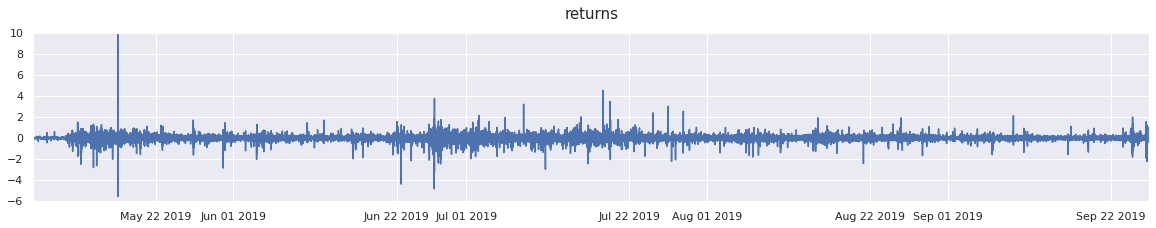

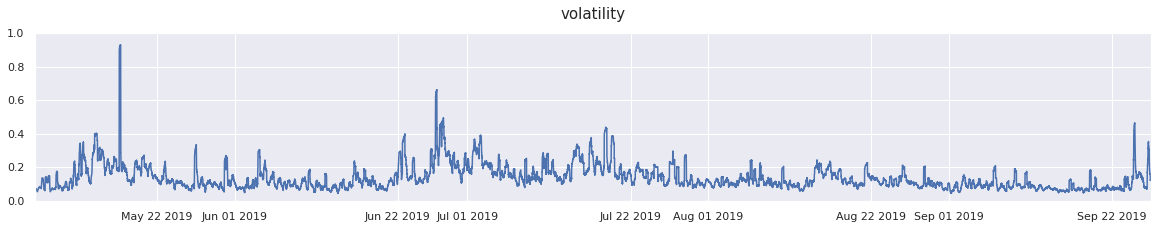

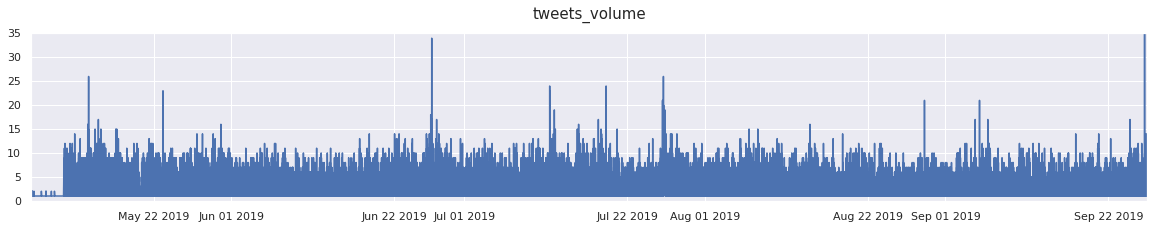

In [ ]:
timeSeriesPlots(df_predictions_2019[["returns", "volatility", "tweets_volume"]])

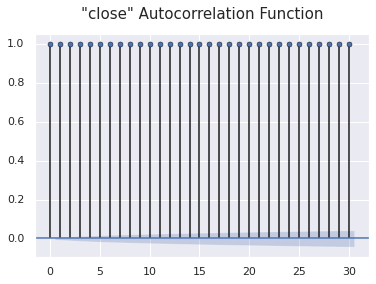

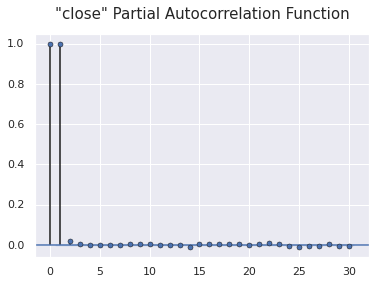

In [ ]:
autocorr_func(df_predictions_2019["close"], nbr_lags=30)

In [ ]:
df_predictions_2019["up_down_next2min"] = df_predictions_2019["up_down"].shift(-2)

df_predictions_2019 = df_predictions_2019.iloc[:-2]

In [ ]:
df_predictions_2019["returns_next2min"] = df_predictions_2019["returns"].shift(-2)

df_predictions_2019 = df_predictions_2019.iloc[:-2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_predictions_2019["volatility_next2min"] = df_predictions_2019["volatility"].shift(-2)

df_predictions_2019 = df_predictions_2019.iloc[:-2]

In [ ]:
df_predictions_2019

,tweets_volume,median_polarity,vader_sentiment_mode,transformers_sentiment_mode,topic_mode,close,returns,up_down,volatility,up_down_next2min,returns_next2min,volatility_next2min
date,,,,,,,,,,,,
2019-05-06 05:29:00,1,0.86250,1,1,"BITCOIN, price, time, block, transactions, siz...",5657.66,0.017500,1,0.113277,-1.0,-0.033911,0.067637
2019-05-06 07:26:00,2,0.75005,1,1,"blockchain, crypto, great, good, project, team...",5599.59,-0.144014,-1,0.067993,1.0,0.051701,0.073179
2019-05-06 07:39:00,1,0.72690,1,1,"money, BITCOIN, news, love, trading, business,...",5601.97,-0.033911,-1,0.067637,-1.0,-0.040469,0.072450
2019-05-06 08:31:00,2,0.82890,1,1,"people, market, shit, bsv, bad, hard, years, g...",5610.62,0.051701,1,0.073179,-1.0,-0.000713,0.072788
2019-05-06 08:48:00,1,0.84420,1,1,"BITCOIN, crypto, free, buy, profit, link, aird...",5608.12,-0.040469,-1,0.072450,-1.0,-0.044076,0.073415
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26 23:48:00,5,-0.38180,0,0,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",8089.50,-0.187968,-1,0.124144,1.0,0.010269,0.121960
2019-09-26 23:49:00,5,-0.51060,0,0,"long, back, alts, short, dump, high, support, ...",8082.16,-0.090776,-1,0.122946,-1.0,-0.134075,0.122263
2019-09-26 23:50:00,1,-0.51060,0,0,"money, BITCOIN, news, love, trading, business,...",8082.99,0.010269,1,0.121960,1.0,0.034482,0.122251


In [ ]:
df_predictions_2019["up_down_next2min"].value_counts()

 1.0    64510
-1.0    63059
Name: up_down_next2min, dtype: int64

In [ ]:
df_predictions_2019["up_down_next2min"].value_counts(normalize=True)

 1.0    0.505687
-1.0    0.494313
Name: up_down_next2min, dtype: float64

In [ ]:
df_predictions_2019.corr()

,tweets_volume,median_polarity,vader_sentiment_mode,transformers_sentiment_mode,close,returns,up_down,volatility,up_down_next2min,returns_next2min,volatility_next2min
tweets_volume,1.000000,0.033258,0.012553,0.081541,0.036190,0.000966,0.000656,0.140143,-0.007181,-0.008094,0.141508
median_polarity,0.033258,1.000000,0.902320,0.582938,-0.008877,0.001593,0.000793,-0.040631,-0.002263,-0.000192,-0.040852
vader_sentiment_mode,0.012553,0.902320,1.000000,0.613168,-0.008453,0.000472,-0.001827,-0.041944,-0.002054,0.001613,-0.042180
transformers_sentiment_mode,0.081541,0.582938,0.613168,1.000000,-0.008486,0.003054,0.001949,-0.029337,-0.001154,0.001361,-0.029324
close,0.036190,-0.008877,-0.008453,-0.008486,1.000000,0.003726,-0.000466,0.083948,-0.006234,-0.006906,0.083864
returns,0.000966,0.001593,0.000472,0.003054,0.003726,1.000000,0.598836,0.003494,-0.009608,-0.004112,0.001133
up_down,0.000656,0.000793,-0.001827,0.001949,-0.000466,0.598836,1.000000,-0.001023,-0.004104,-0.001951,-0.001661
volatility,0.140143,-0.040631,-0.041944,-0.029337,0.083948,0.003494,-0.001023,1.000000,-0.000890,0.004097,0.998667
up_down_next2min,-0.007181,-0.002263,-0.002054,-0.001154,-0.006234,-0.009608,-0.004104,-0.000890,1.000000,0.598836,-0.001028
returns_next2min,-0.008094,-0.000192,0.001613,0.001361,-0.006906,-0.004112,-0.001951,0.004097,0.598836,1.000000,0.003489


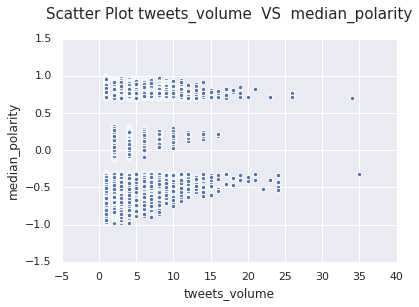

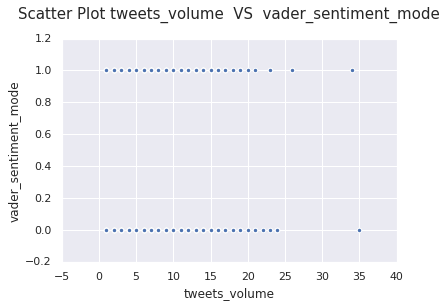

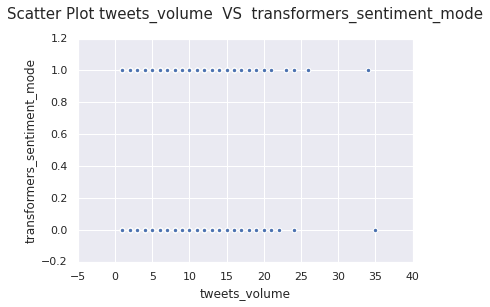

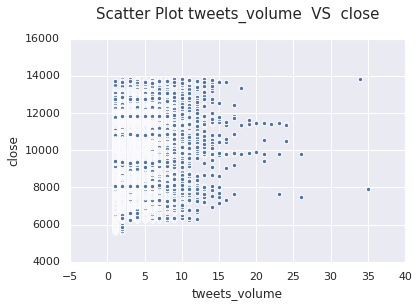

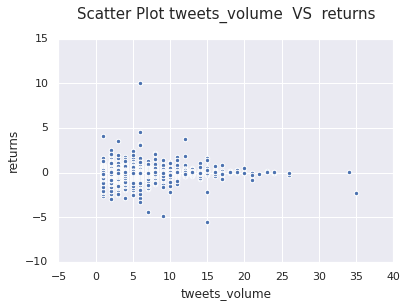

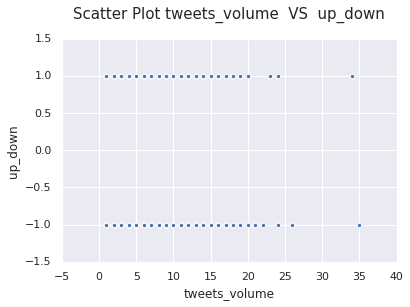

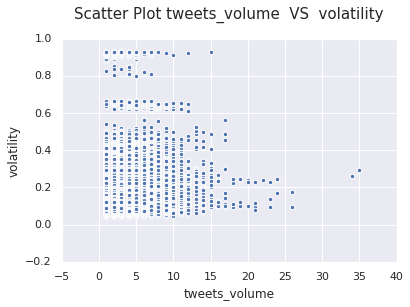

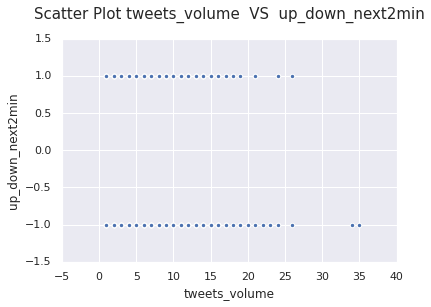

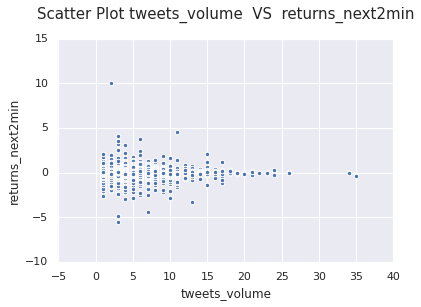

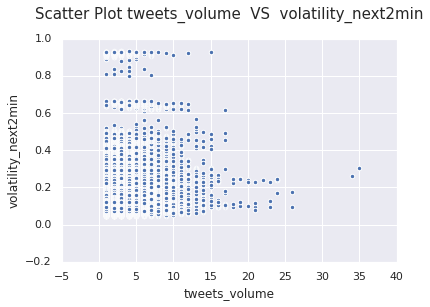

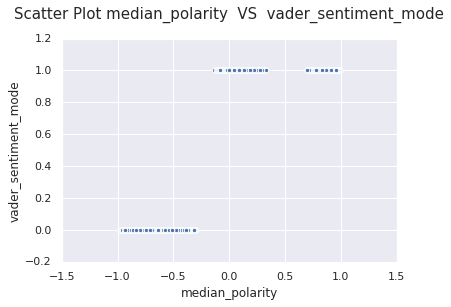

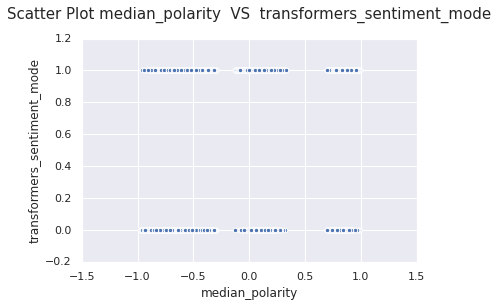

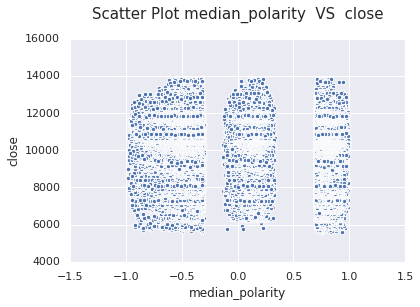

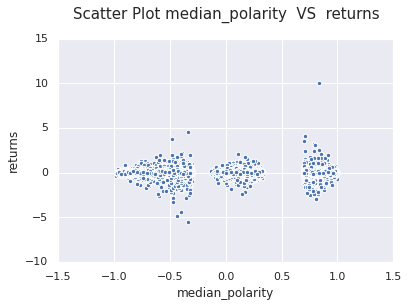

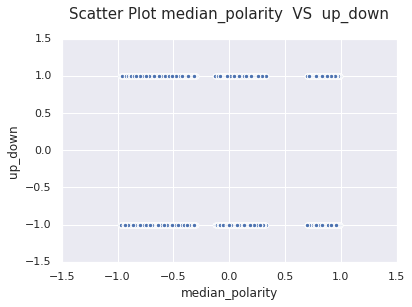

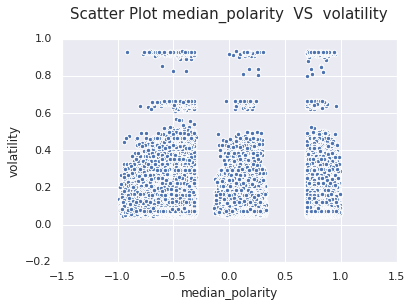

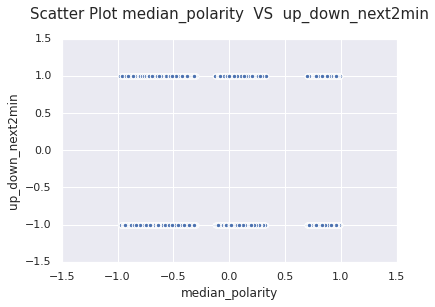

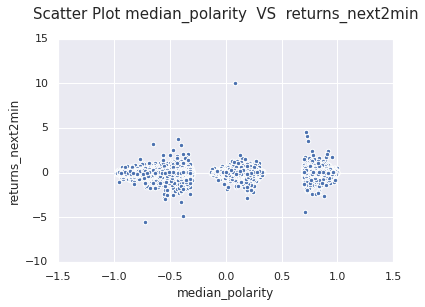

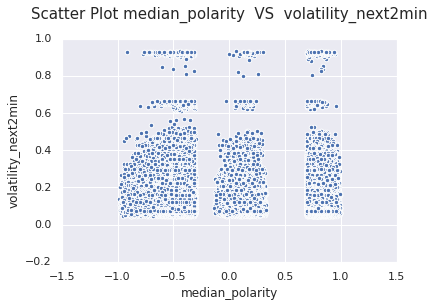

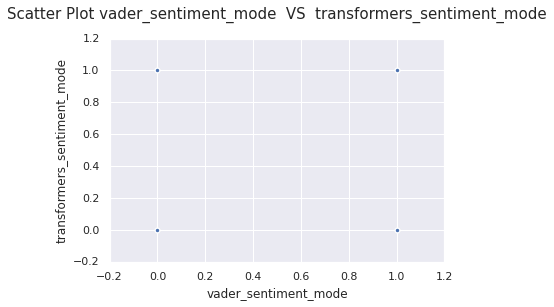

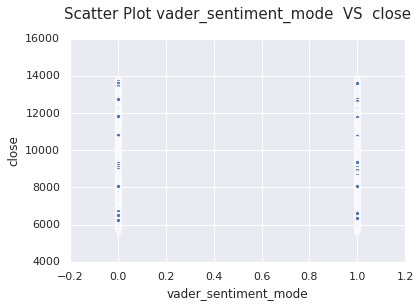

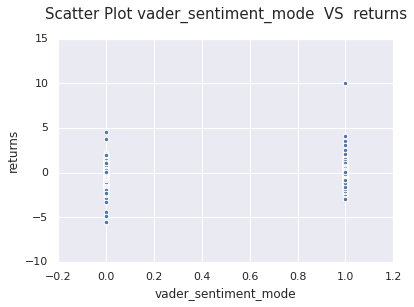

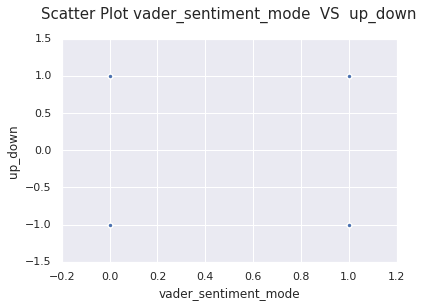

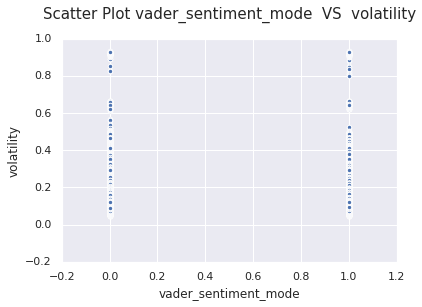

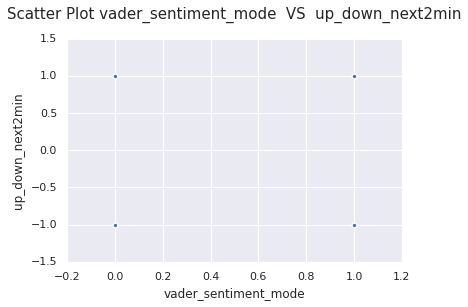

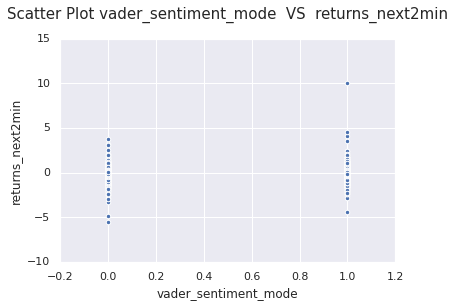

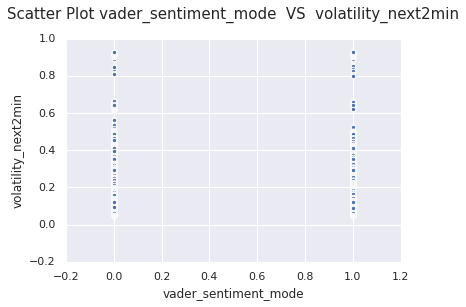

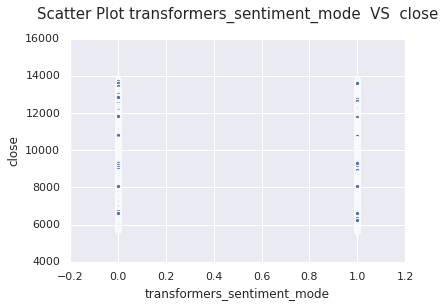

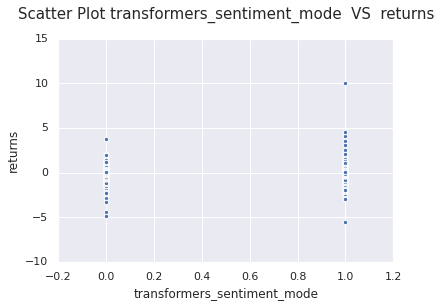

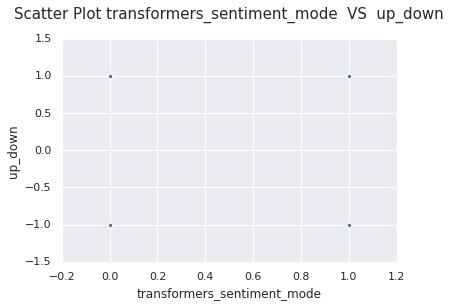

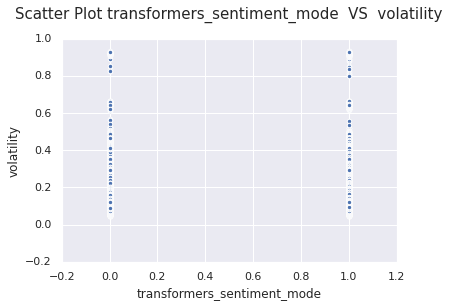

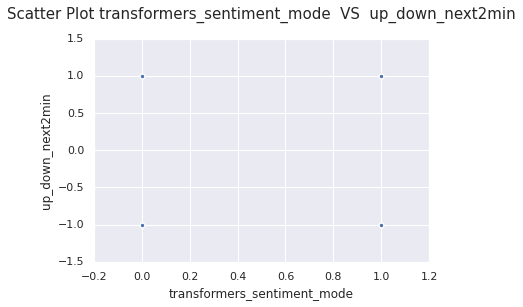

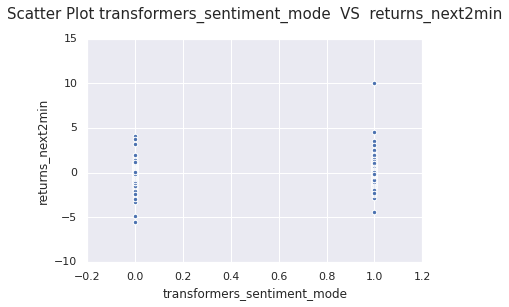

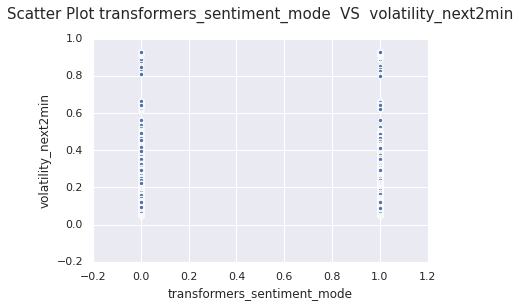

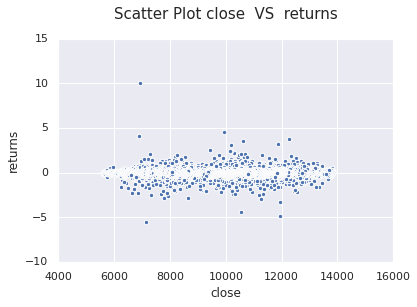

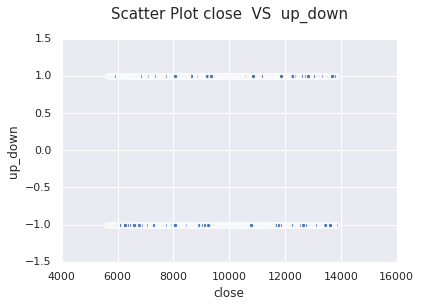

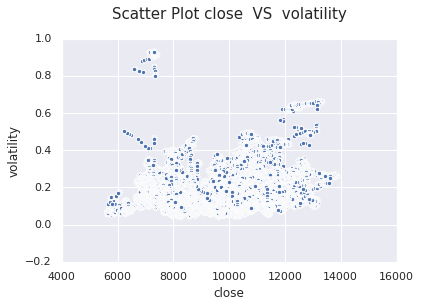

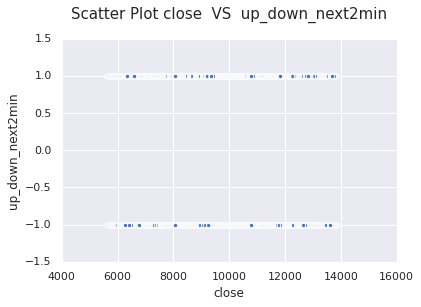

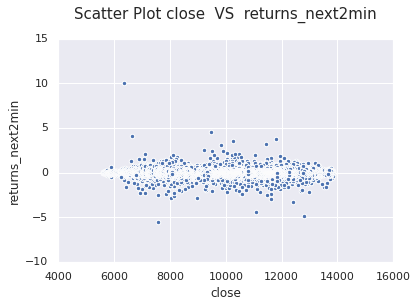

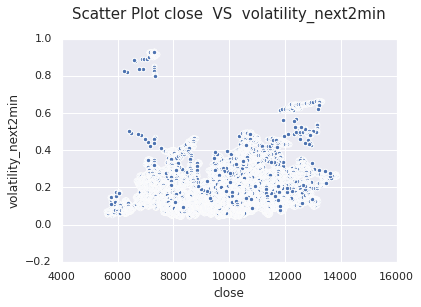

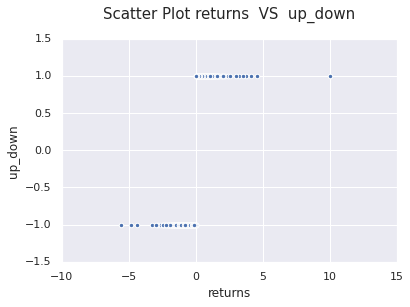

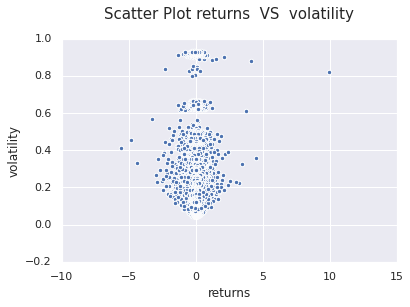

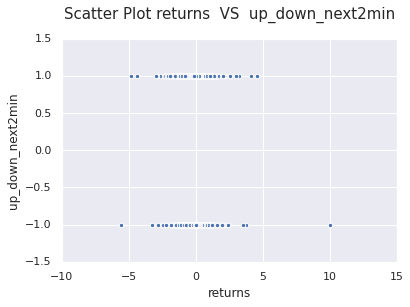

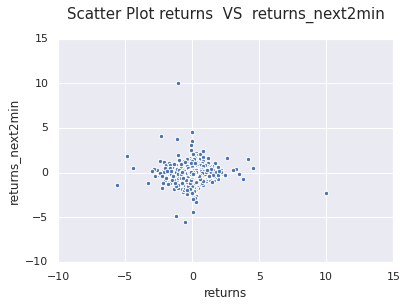

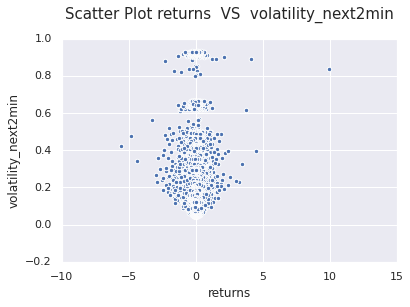

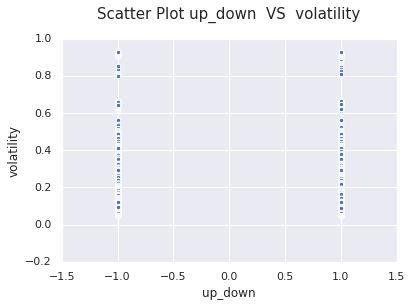

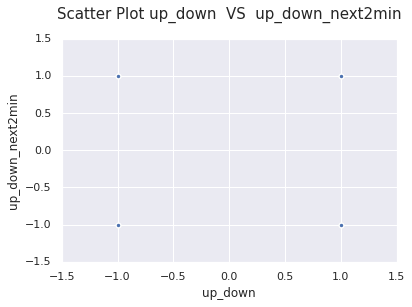

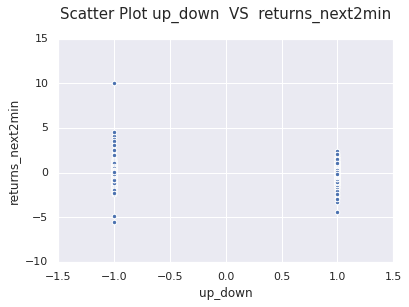

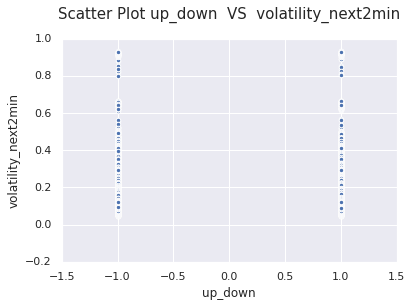

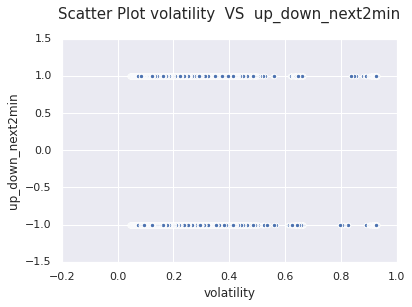

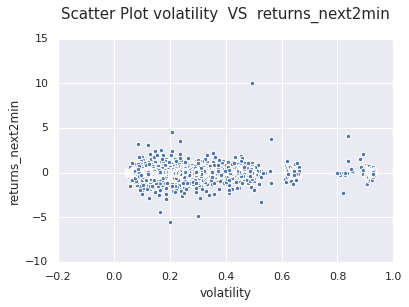

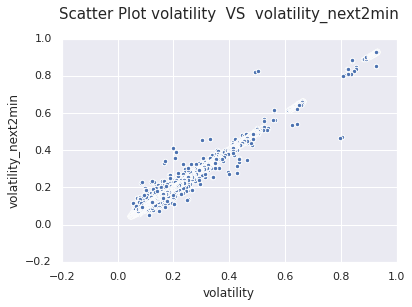

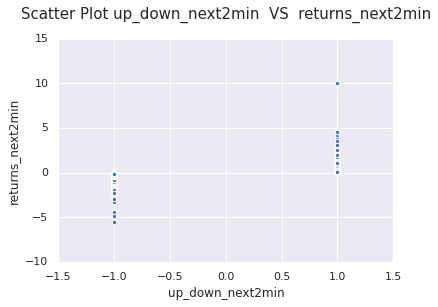

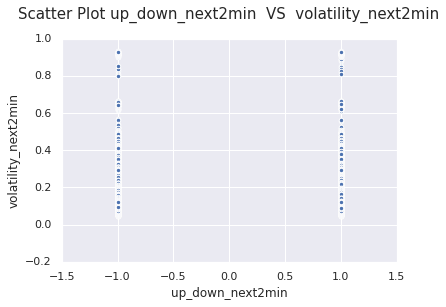

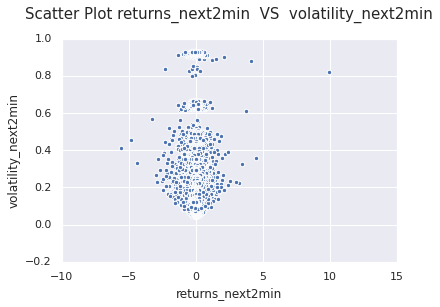

In [ ]:
scatterplots(df_predictions_2019, df_predictions_2019.columns)

In [ ]:
df_predictions_2019.to_csv('/gdrive/My Drive/TextAnalytics/datasets/df_predictions_2019.csv')

# 2021

## Tweets

In [ ]:
df_tweets_sentiment_2021 = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_tweets_sentiment_2021.csv")

df_tweets_sentiment_2021['date'] = pd.to_datetime(df_tweets_sentiment_2021['date'])
df_tweets_sentiment_2021 = df_tweets_sentiment_2021.set_index(['date']).sort_index()

In [ ]:
df_tweets_sentiment_2021 = df_tweets_sentiment_2021.drop(["user_created", "user_friends", "user_favourites",
                                                          "user_verified", "hashtags", "source"], axis=1)

In [ ]:
df_tweets_sentiment_2021

,user_name,user_followers,text,vader_polarity,vader_sentiment,transformers_sentiment
date,,,,,,
2021-02-05 11:14:18,EmilyNews,439.0,warning powerearn outside project fast scam si...,-0.7269,0,0
2021-02-05 11:20:58,Trading MarcoDaCosta,5367.0,twitter ceo jack dorsey has fired up a full bi...,-0.5574,0,1
2021-02-05 11:25:28,Kris Ninakos,741.0,a possible big move for btc bitcoin is coming ...,-0.2023,0,1
2021-02-05 11:39:20,Emanuel Siddhartha,15.0,no vcs no ico no unlimited supply no pump and ...,-0.8910,0,1
2021-02-05 11:44:02,Bitcoin Mate (BTC News App),3312.0,bitcoin s wild ride renews worries about its m...,-0.4215,0,0
...,...,...,...,...,...,...
2021-07-30 23:59:16,Alt Center Signals,197.0,binance futures srm usdt all take profit targe...,0.8271,1,1
2021-07-30 23:59:36,George Brien,12443.0,bitcoin at k will hit k soon hodl yours don t ...,-0.5106,0,0
2021-07-30 23:59:38,HODL21,477.0,i m actually one of the few people i know who ...,-0.2960,0,1


In [ ]:
df_tweets_sentiment_2021["sum_user_followers"] = df_tweets_sentiment_2021.groupby(df_tweets_sentiment_2021.index.strftime('%Y-%m-%d %H:%M:00')).user_followers.transform(np.sum)

df_tweets_sentiment_2021["weighted_polarity"] = (df_tweets_sentiment_2021["vader_polarity"] * df_tweets_sentiment_2021["user_followers"]) / df_tweets_sentiment_2021["sum_user_followers"]

In [ ]:
agg_dict = {"text": "count",
            "vader_polarity": "median",
            "weighted_polarity": "sum",
            "vader_sentiment": lambda x: x.value_counts().index[0],
            "transformers_sentiment": lambda x: x.value_counts().index[0]
            }

In [ ]:
df_tweets_2021_grouped = df_tweets_sentiment_2021.groupby(df_tweets_sentiment_2021.index.strftime('%Y-%m-%d %H:%M:00')).agg(agg_dict)

In [ ]:
df_tweets_2021_grouped.columns = ["tweets_volume", "median_polarity", "weighted_mean_polarity", "vader_sentiment_mode", "transformers_sentiment_mode"]

In [ ]:
df_tweets_2021_grouped

,tweets_volume,median_polarity,weighted_mean_polarity,vader_sentiment_mode,transformers_sentiment_mode
date,,,,,
2021-02-05 11:14:00,1,-0.7269,-0.726900,0,0
2021-02-05 11:20:00,1,-0.5574,-0.557400,0,1
2021-02-05 11:25:00,1,-0.2023,-0.202300,0,1
2021-02-05 11:39:00,1,-0.8910,-0.891000,0,1
2021-02-05 11:44:00,1,-0.4215,-0.421500,0,0
...,...,...,...,...,...
2021-07-30 23:55:00,10,-0.4338,-0.394789,0,1
2021-07-30 23:56:00,5,-0.5994,-0.277455,0,0
2021-07-30 23:57:00,7,-0.4019,-0.396384,0,0


## Prices

In [ ]:
df_prices_2021 = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_prices_2021.csv")

df_prices_2021['date'] = pd.to_datetime(df_prices_2021['date'])
df_prices_2021 = df_prices_2021.set_index(['date']).sort_index()

df_prices_2021

,close
date,
2021-02-05 10:51:00,37479.56
2021-02-05 10:52:00,37449.80
2021-02-05 10:53:00,37430.00
2021-02-05 10:54:00,37430.96
2021-02-05 10:55:00,37473.12
...,...
2021-07-30 23:55:00,42130.00
2021-07-30 23:56:00,42122.38
2021-07-30 23:57:00,42222.20


In [ ]:
df_prices_2021["returns"] = np.log(df_prices_2021["close"]/df_prices_2021["close"].shift(1)) * 100

df_prices_2021 = df_prices_2021.iloc[1:]

In [ ]:
df_prices_2021["up_down"] = df_prices_2021["returns"].apply(lambda x: 1 if x >= 0 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
window = 240

df_prices_2021["volatility"] = df_prices_2021["returns"].rolling(window).std(ddof=0)

df_prices_2021 = df_prices_2021.iloc[239:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_prices_2021

,close,returns,up_down,volatility
date,,,,
2021-02-05 14:54:00,38259.40,0.019840,1,0.097696
2021-02-05 14:55:00,38222.44,-0.096650,-1,0.097767
2021-02-05 14:56:00,38199.36,-0.060402,-1,0.097788
2021-02-05 14:57:00,38153.42,-0.120336,-1,0.098139
2021-02-05 14:58:00,38171.60,0.047638,1,0.097939
...,...,...,...,...
2021-07-30 23:55:00,42130.00,-0.173218,-1,0.220638
2021-07-30 23:56:00,42122.38,-0.018089,-1,0.220659
2021-07-30 23:57:00,42222.20,0.236696,1,0.221064


## Final Dataset Predictions 2021

In [ ]:
df_predictions_2021 = pd.merge(df_tweets_2021_grouped, df_prices_2021, left_index=True, right_index=True, how="inner")

In [ ]:
df_predictions_2021

,tweets_volume,median_polarity,weighted_mean_polarity,vader_sentiment_mode,transformers_sentiment_mode,close,returns,up_down,volatility
date,,,,,,,,,
2021-02-05 14:56:00,1,-0.5859,-0.585900,0,0,38199.36,-0.060402,-1,0.097788
2021-02-05 14:59:00,1,-0.3400,-0.340000,0,1,38153.19,-0.048241,-1,0.097983
2021-02-05 15:00:00,1,-0.5719,-0.571900,0,0,38192.10,0.101932,1,0.098151
2021-02-05 15:01:00,1,-0.6367,-0.636700,0,1,38209.04,0.044345,1,0.098109
2021-02-05 15:06:00,1,-0.5945,-0.594500,0,0,38132.74,-0.066037,-1,0.097260
...,...,...,...,...,...,...,...,...,...
2021-07-30 23:55:00,10,-0.4338,-0.394789,0,1,42130.00,-0.173218,-1,0.220638
2021-07-30 23:56:00,5,-0.5994,-0.277455,0,0,42122.38,-0.018089,-1,0.220659
2021-07-30 23:57:00,7,-0.4019,-0.396384,0,0,42222.20,0.236696,1,0.221064


In [ ]:
df_predictions_2021["transformers_sentiment_mode"].value_counts()

1    31374
0     7378
Name: transformers_sentiment_mode, dtype: int64

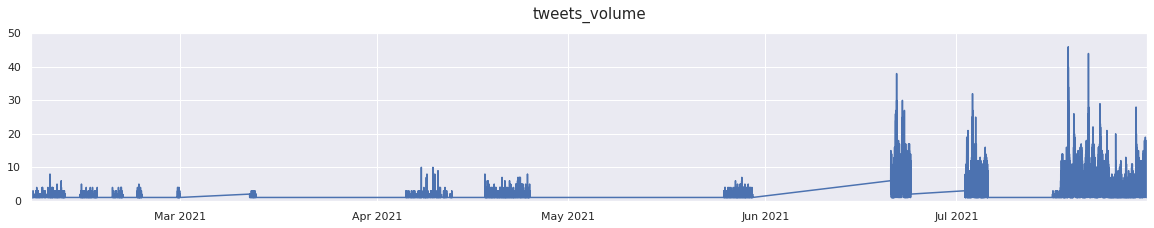

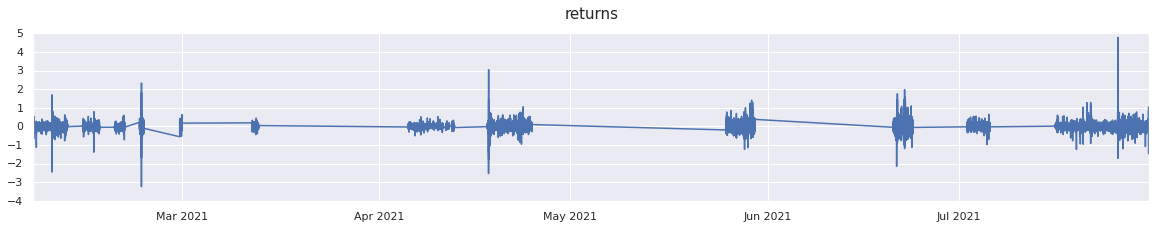

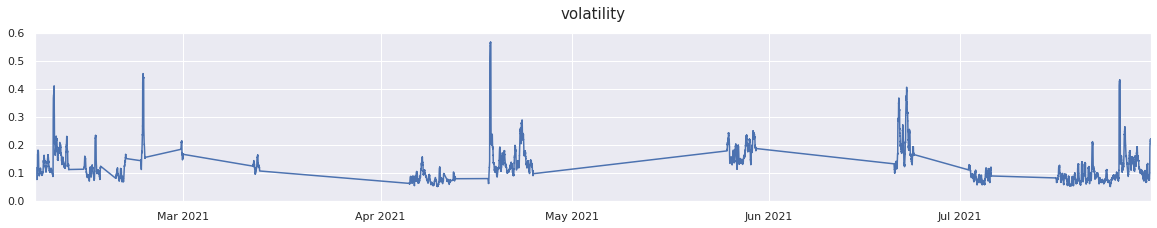

In [ ]:
timeSeriesPlots(df_predictions_2021[["tweets_volume", "returns", "volatility"]])

In [ ]:
df_predictions_2021["up_down_next2min"] = df_predictions_2021["up_down"].shift(-2)

In [ ]:
df_predictions_2021 = df_predictions_2021.iloc[:-2]

In [ ]:
df_predictions_2021

,tweets_volume,median_polarity,weighted_mean_polarity,vader_sentiment_mode,transformers_sentiment_mode,close,returns,up_down,volatility,up_down_next2min
date,,,,,,,,,,
2021-02-05 14:56:00,1,-0.58590,-0.585900,0,0,38199.36,-0.060402,-1,0.097788,1.0
2021-02-05 14:59:00,1,-0.34000,-0.340000,0,1,38153.19,-0.048241,-1,0.097983,1.0
2021-02-05 15:00:00,1,-0.57190,-0.571900,0,0,38192.10,0.101932,1,0.098151,-1.0
2021-02-05 15:01:00,1,-0.63670,-0.636700,0,1,38209.04,0.044345,1,0.098109,-1.0
2021-02-05 15:06:00,1,-0.59450,-0.594500,0,0,38132.74,-0.066037,-1,0.097260,1.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-30 23:53:00,12,-0.37765,-0.437077,0,1,41955.18,0.150583,1,0.217409,-1.0
2021-07-30 23:54:00,8,-0.37095,-0.561877,0,0,42203.04,0.589035,1,0.220254,-1.0
2021-07-30 23:55:00,10,-0.43380,-0.394789,0,1,42130.00,-0.173218,-1,0.220638,1.0


In [ ]:
df_predictions_2021["up_down_next2min"].value_counts()

 1.0    19627
-1.0    19123
Name: up_down_next2min, dtype: int64

In [ ]:
df_predictions_2021["up_down_next2min"].value_counts(normalize=True)

 1.0    0.506503
-1.0    0.493497
Name: up_down_next2min, dtype: float64

In [ ]:
df_predictions_2021.to_csv('/gdrive/My Drive/TextAnalytics/datasets/df_predictions_2021.csv')